In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_0 = pd.read_parquet('dataset/train_0.parquet')
train_1 = pd.read_parquet('dataset/train_1.parquet')

In [4]:
test_df = pd.read_parquet('dataset/train_2.parquet')
test_df = test_df.dropna(axis=1, how='any')

In [5]:
train_1_na = train_1.dropna(axis=1, how='any')

In [6]:
train_0_na = train_0.dropna(axis=1, how='any')

In [7]:
train_df = pd.concat([train_0_na, train_1_na], axis=0)

In [8]:
train_df = train_df.reset_index(drop=True)

In [9]:
test_df.head()

,date_id,time_id,symbol_id,weight,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,...,feature_78,target_9,target_3,target_4,target_5,target_6,target_7,target_1,target_8,target_2
0,170,0,0,2.112212,1.060330,1.515157,0.352634,-0.447763,11,7,...,-0.421823,-0.293646,-0.061842,-0.305413,-0.419151,-0.111796,-0.535104,-0.044332,-0.039061,-0.744789
1,170,0,1,2.760715,0.482468,1.184037,0.171099,-0.247298,11,7,...,3.111076,-0.075267,-0.359360,-1.270054,-0.018332,-0.040286,-1.417509,0.085840,0.487232,-0.124533
2,170,0,2,1.813596,1.020798,1.318752,0.398088,-0.247506,81,2,...,0.458474,-5.000000,-5.000000,0.194658,-5.000000,-5.000000,-5.000000,1.583400,0.018712,-1.055035
3,170,0,3,0.926893,0.510098,0.645825,0.198428,-0.129691,4,3,...,17.805511,3.336086,2.051951,2.400644,0.962730,-0.939277,1.845870,-2.372452,-1.663179,-4.585349
4,170,0,7,1.665231,0.547458,1.009267,0.178444,-0.172451,11,7,...,-0.249322,-0.707027,-0.344866,-1.248052,-0.129645,-3.145927,-0.452708,0.300044,0.489202,0.242737


Check for different symbol_ids

In [34]:
# Step 1: Sort train_df by symbol_id
train_df = train_df.sort_values(by="symbol_id")

# Step 2: Group by symbol_id and sort each group by date_id and time_id
train_symbol_dfs = {
    symbol: df.sort_values(by=["date_id", "time_id"])  # Sorting within each symbol_id
    for symbol, df in train_df.groupby("symbol_id")
}

# Print number of unique symbol_ids
print(f"Created {len(train_symbol_dfs)} sorted dataframes, one for each unique symbol_id.")

Created 20 sorted dataframes, one for each unique symbol_id.


In [35]:
train_symbol_dfs.keys()

dict_keys([0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 30, 33, 34, 38])

In [36]:
train_symbol_dfs[0].head()

,date_id,time_id,symbol_id,weight,feature_05,feature_06,feature_07,feature_09,feature_10,feature_11,...,target_4,target_5,target_6,target_7,target_1,target_8,target_2,feature_47,feature_75,feature_76
972117,99,486,0,2.611484,0.076232,-0.034908,0.077725,11,7,76,...,0.004940,-0.055612,0.086167,-0.073704,-0.275256,0.113787,-0.454601,0.280522,-0.255780,-0.199244
972131,99,487,0,2.611484,-0.059121,-0.782348,-0.356738,11,7,76,...,0.006096,-0.056998,0.089260,-0.063097,-0.129430,0.150239,-0.418502,0.355637,-0.216946,-0.197968
972145,99,488,0,2.611484,-0.118976,-1.244603,-0.481132,11,7,76,...,-0.005772,-0.039852,0.044025,-0.176093,-0.285174,0.121544,-0.622181,0.319851,-0.243303,-0.231058
972159,99,489,0,2.611484,-0.341506,-1.757061,-0.531845,11,7,76,...,0.316468,0.278947,0.147607,0.299458,0.267488,0.230691,0.125481,0.407797,-0.215172,-0.163405
972173,99,490,0,2.611484,-0.411652,-0.990268,-0.718464,11,7,76,...,0.247160,0.335530,0.223607,0.142621,0.481101,0.305116,-0.063074,0.307307,-0.149662,-0.253741


In [37]:
train_symbol_dfs[1].head()

,date_id,time_id,symbol_id,weight,feature_05,feature_06,feature_07,feature_09,feature_10,feature_11,...,target_4,target_5,target_6,target_7,target_1,target_8,target_2,feature_47,feature_75,feature_76
972118,99,486,1,4.334187,0.114624,-0.044096,0.100659,11,7,76,...,-0.147192,-0.635898,-0.440264,-0.423031,-1.174912,-0.816565,-0.452103,0.327057,-0.269211,-0.232343
972132,99,487,1,4.334187,-0.046783,-0.688643,-0.186810,11,7,76,...,-0.120688,-0.676395,-0.547303,-0.280214,-0.820101,-0.524503,-0.492162,0.293195,-0.191398,-0.169243
972146,99,488,1,4.334187,-0.133826,-0.948892,-0.441494,11,7,76,...,-0.115366,-0.559438,-0.749091,-0.437278,-1.011155,-0.972010,-0.500489,0.333524,-0.358861,-0.217664
972160,99,489,1,4.334187,-0.343093,-1.988549,-0.963709,11,7,76,...,0.021227,-0.277627,-0.472024,-0.576552,-0.439468,-0.825679,-0.907038,0.337606,-0.307934,-0.193425
972174,99,490,1,4.334187,-0.254479,-1.106739,-0.855300,11,7,76,...,0.022623,-0.116770,-0.405043,-0.820252,-0.392966,-0.705268,-0.972355,0.180986,-0.269244,-0.193418


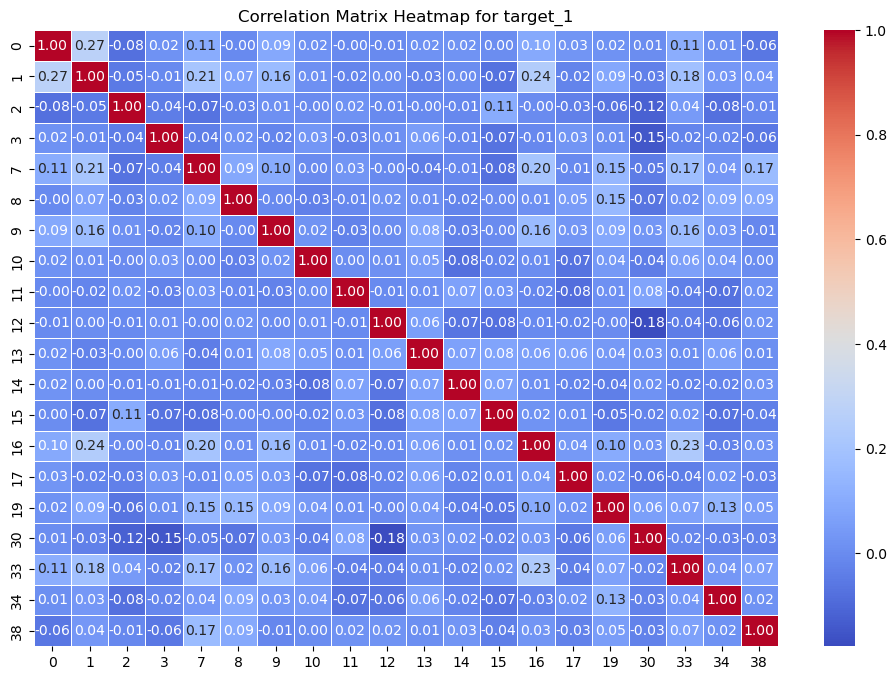

In [38]:
# Step 1: Extract target_1 values for each symbol_id
target_1_dict = {symbol: df["target_1"].reset_index(drop=True) for symbol, df in train_symbol_dfs.items()}

# Step 2: Convert dictionary to a DataFrame (columns = symbol_ids, rows = target_1 values)
target_1_df = pd.DataFrame(target_1_dict)

# Step 3: Compute correlation matrix
correlation_matrix = target_1_df.corr()

# Step 4: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for target_1")
plt.show()

Linear Regression Baselines

In [ ]:
test_df['symbol_id']

20

In [24]:
# Get unique symbol_ids from train and test DataFrames
train_symbols = set(train_df["symbol_id"].unique())
test_symbols = set(test_df["symbol_id"].unique())

# Find common symbol_ids
common_symbols = train_symbols & test_symbols  # Intersection of sets

# Convert to sorted list (optional)
common_symbols = sorted(common_symbols)

print(f"Number of common symbol_ids: {len(common_symbols)}")
print("Common symbol_ids:", common_symbols)

Number of common symbol_ids: 20
Common symbol_ids: [0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 30, 33, 34, 38]


In [42]:
# Count number of rows for each symbol_id
symbol_counts = {symbol_id: df.shape[0] for symbol_id, df in train_symbol_dfs.items()}

# Convert to DataFrame for better readability
symbol_counts_df = pd.DataFrame(list(symbol_counts.items()), columns=["symbol_id", "num_rows"])

# Display the result
print(symbol_counts_df)

    symbol_id  num_rows
0           0     12345
1           1     12345
2           2     10648
3           3      8490
4           7     12346
5           8     12345
6           9     12345
7          10     11132
8          11      8005
9          12     10647
10         13     11496
11         14      8490
12         15      2547
13         16     12345
14         17      6887
15         19     12345
16         30       849
17         33     12345
18         34      9703
19         38     12345


In [43]:
# Step 1: Sort test_df by symbol_id
test_df = test_df.sort_values(by="symbol_id")

# Step 2: Group by symbol_id and sort each group by date_id and time_id
test_symbol_dfs = {
    symbol: df.sort_values(by=["date_id", "time_id"])  # Sorting within each symbol_id
    for symbol, df in test_df.groupby("symbol_id")
}

# Print number of unique symbol_ids
print(f"Created {len(test_symbol_dfs)} sorted dataframes, one for each unique symbol_id.")

Created 20 sorted dataframes, one for each unique symbol_id.


In [44]:
# Count number of rows for each symbol_id
symbol_counts = {symbol_id: df.shape[0] for symbol_id, df in test_symbol_dfs.items()}

# Convert to DataFrame for better readability
symbol_counts_df = pd.DataFrame(list(symbol_counts.items()), columns=["symbol_id", "num_rows"])

# Display the result
print(symbol_counts_df)

    symbol_id  num_rows
0           0     11316
1           1     11316
2           2      9618
3           3     11316
4           7     11315
5           8     11315
6           9     10466
7          10     11315
8          11      4523
9          12     11037
10         13     11315
11         14      7641
12         15      5094
13         16     11315
14         17      9617
15         19     11315
16         30      8768
17         33     11315
18         34      8768
19         38     11315


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Extract data for symbol_id = 0 from train and test dictionaries
df_0 = pd.concat([train_symbol_dfs[0], test_symbol_dfs[0]], ignore_index=True)
df_0 = df_0.dropna(axis=1)

# Step 2: Select feature columns that exist in df_0
feature_cols = [col for col in df_0.columns if col.startswith("feature_")]

# Step 3: Prepare data
X = df_0[feature_cols].values
y = df_0["target_1"].values
weights = df_0["weight"].values  # For weighted R² computation
y_adj = df_0["target_1"].values * np.sqrt(weights)  # Adjusted target

# Step 4: Train-test split (80/20)
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
    X, y_adj, weights, test_size=0.2, random_state=42
)


In [59]:
# Step 5: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Step 6: Predict on test set
y_pred = model.predict(X_test)

# Step 7: Adjust for weights by multiplying with sqrt(weights)
# y_test_adj = y_test * np.sqrt(weights_test)
# y_pred_adj = y_pred * np.sqrt(weights_test)

# Step 8: Compute weighted R² score
r2 = r2_score(y_test, y_pred)

print(f"Adjusted R² score on test set: {r2:.4f}")

Adjusted R² score on test set: 0.0401


Testing lagged data

c:\Users\Garv\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Garv\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


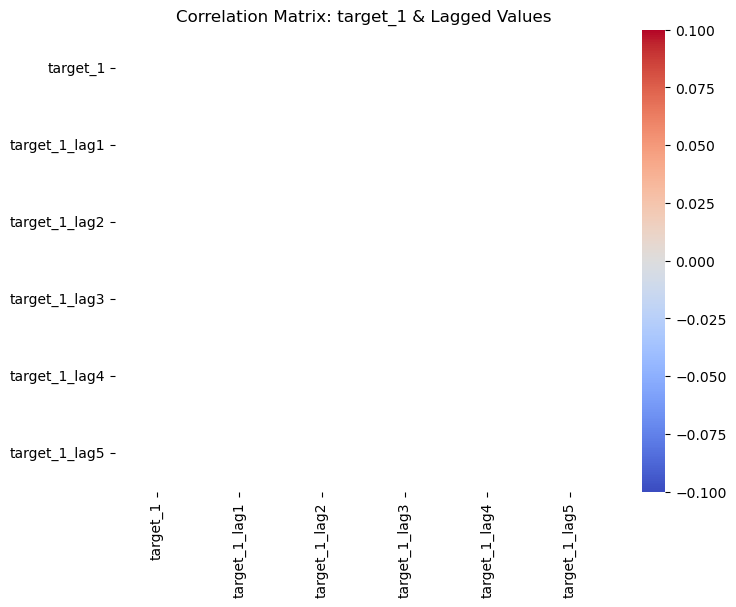

In [61]:
# Step 1: Extract data for symbol_id = 0
df_0 = pd.concat([train_symbol_dfs[0], test_symbol_dfs[0]], ignore_index=True)

# Step 2: Sort by date_id and time_id to maintain correct order
df_0 = df_0.sort_values(by=["date_id", "time_id"]).reset_index(drop=True)

# Step 3: Create lagged target_1 columns (up to 5 lags)
for lag in range(1, 6):
    df_0[f"target_1_lag{lag}"] = df_0["target_1"].shift(lag)

# Step 4: Drop NaN values (first 5 rows will have NaNs due to shifting)
df_0 = df_0.dropna()

# Step 5: Compute correlation matrix
corr_matrix = df_0[["target_1"] + [f"target_1_lag{i}" for i in range(1, 6)]].corr()

# Step 6: Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: target_1 & Lagged Values")
plt.show()
